## Restaurant Tips Analysis and Prediction

# This notebook performs a comprehensive analysis of restaurant tips data, including:
# - Exploratory Data Analysis (EDA)
# - Statistical Analysis
# - Machine Learning Model Training and Evaluation

### Setup and Imports


In [5]:

# %%
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [6]:
# Machine learning imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


### Data Loading and Initial Exploration


# Load the dataset
# Replace with the actual file ID from your URL

In [7]:
# Configure visualizations


file_id = "1Xkm84DEOHqZ6YNnNP3jzerpUPU6LoCyJ"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Load the dataset
df = pd.read_csv(download_url)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

First few rows:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64



# Exploratory Data Analysis (EDA)

### Let's explore the relationships between different variables in our dataset.



In [9]:

# Set up categorical and numerical columns
categorical_columns = ['sex', 'smoker', 'day', 'time', 'size']
numerical_columns = ['total_bill', 'tip']

# Basic statistics for numerical columns
print("Statistical Summary:")
display(df.describe())

Statistical Summary:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


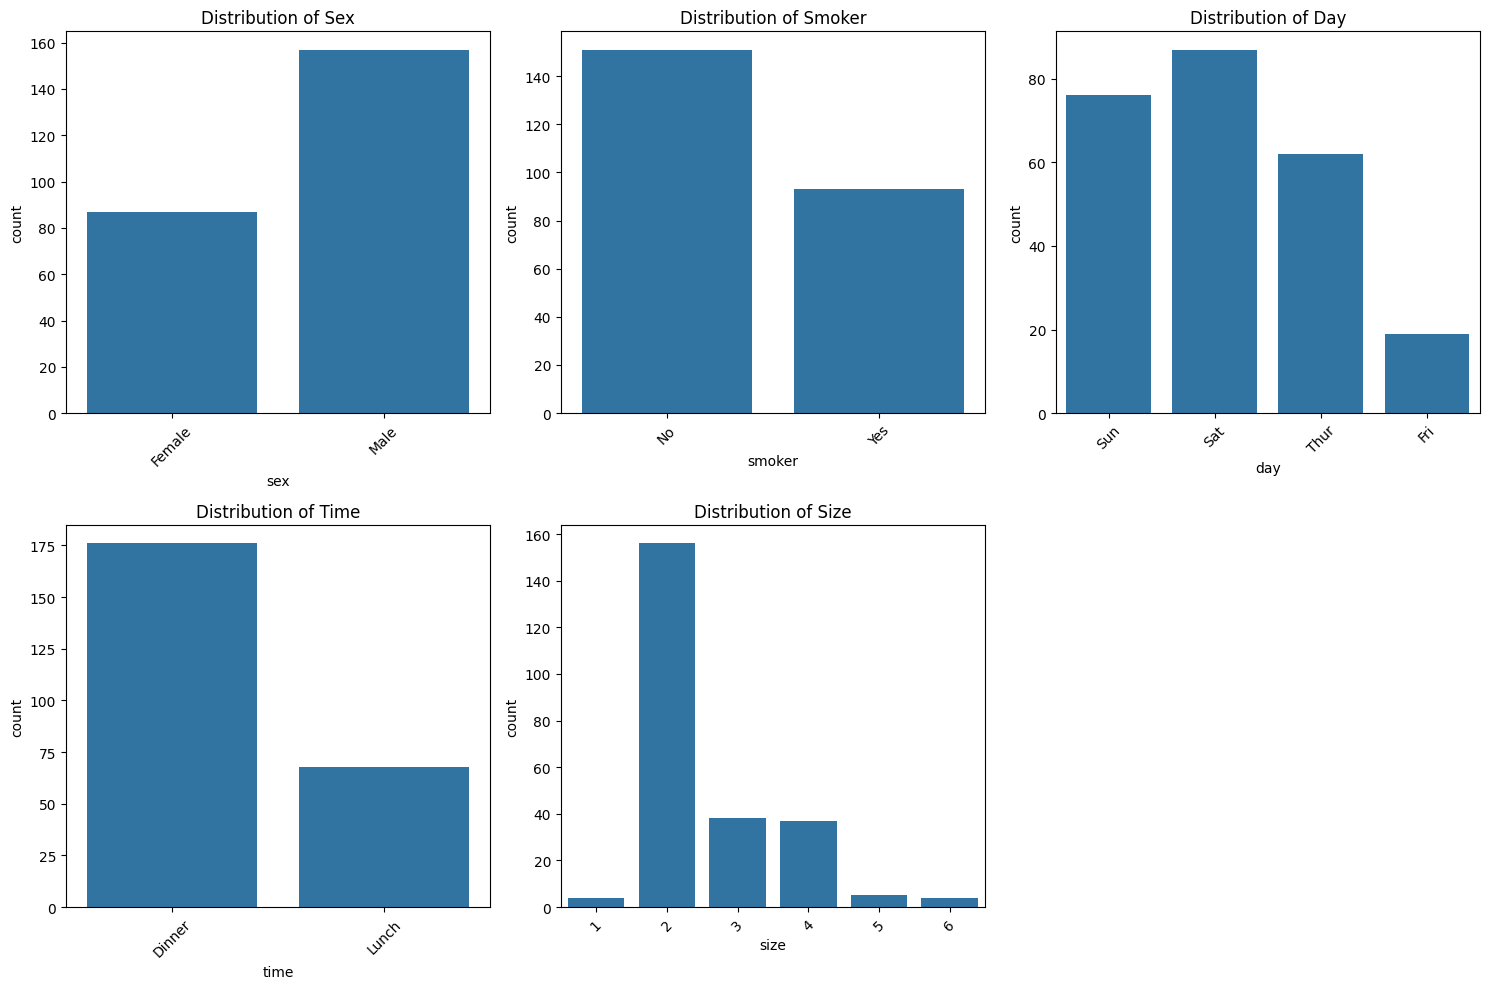

In [10]:



# Create a figure with subplots for categorical variables
plt.figure(figsize=(15, 10))

# Plot distribution of categorical variables
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col.title()}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

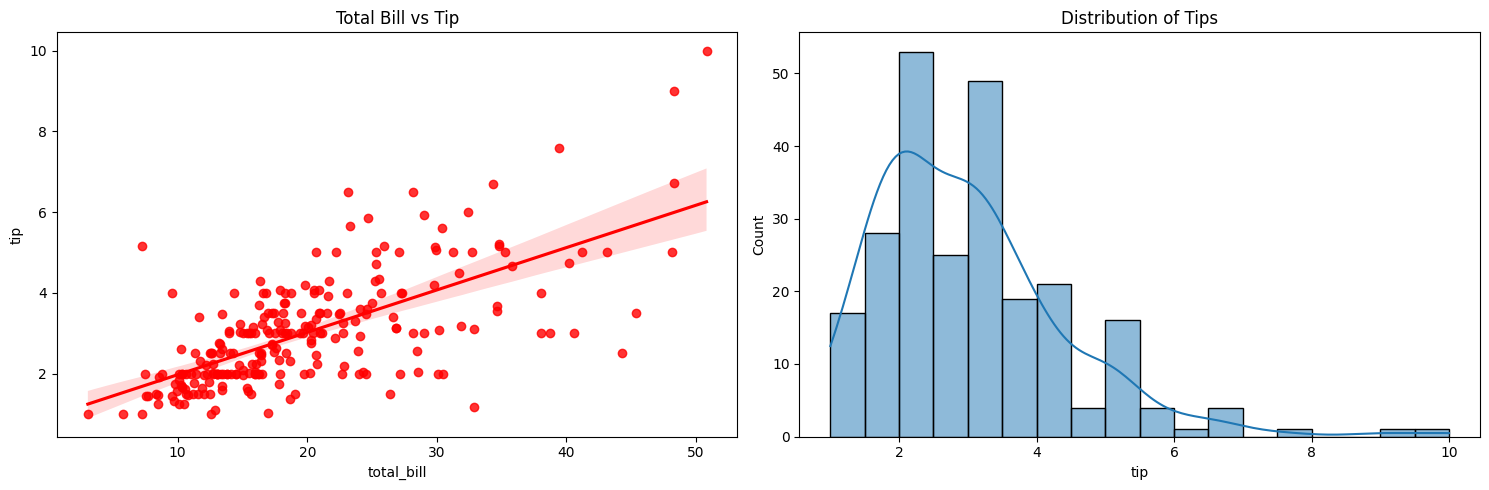

In [11]:


# %%
# Create visualizations for numerical relationships
plt.figure(figsize=(15, 5))

# Total Bill vs Tip relationship
plt.subplot(1, 2, 1)
sns.regplot(x='total_bill', y='tip', data=df, color='red')
plt.title('Total Bill vs Tip')

# Tip distribution
plt.subplot(1, 2, 2)
sns.histplot(df['tip'], kde=True)
plt.title('Distribution of Tips')

plt.tight_layout()
plt.show()



# Distribution of Categorical Variables

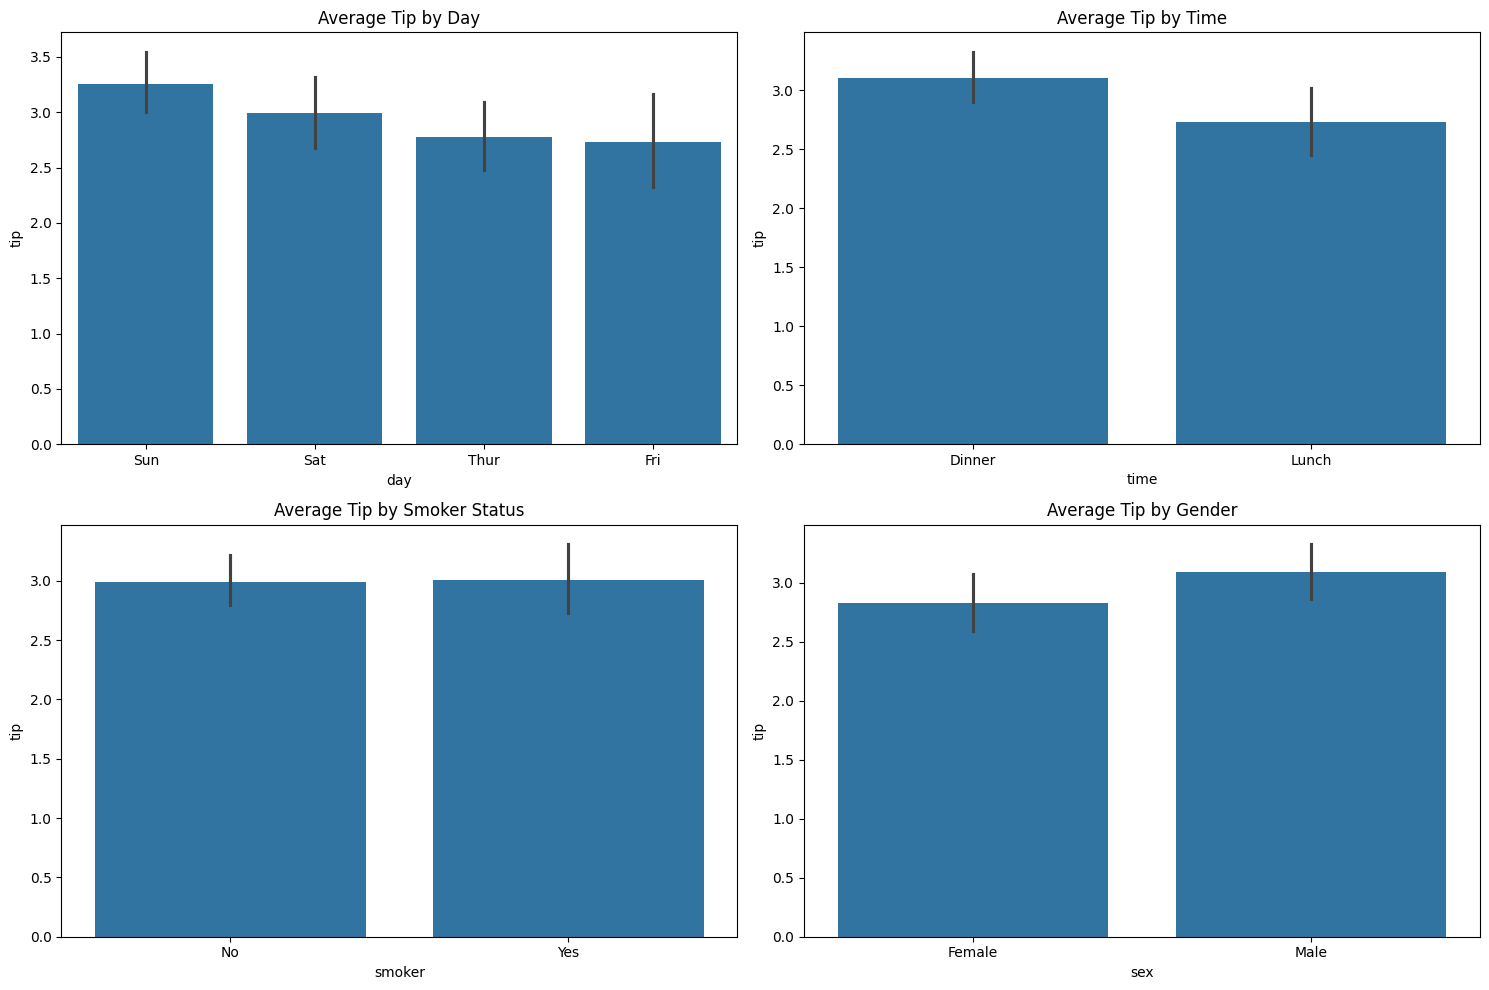

In [12]:
# %% [markdown]
# ### Additional Insights

# %%
# Average tip by different categories
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Average tip by day
sns.barplot(data=df, x='day', y='tip', ax=axes[0,0])
axes[0,0].set_title('Average Tip by Day')

# Average tip by time
sns.barplot(data=df, x='time', y='tip', ax=axes[0,1])
axes[0,1].set_title('Average Tip by Time')

# Average tip by smoker status
sns.barplot(data=df, x='smoker', y='tip', ax=axes[1,0])
axes[1,0].set_title('Average Tip by Smoker Status')

# Average tip by gender
sns.barplot(data=df, x='sex', y='tip', ax=axes[1,1])
axes[1,1].set_title('Average Tip by Gender')

plt.tight_layout()
plt.show()



# Statistical Analysis

In [13]:

#
# Let's perform ANOVA tests to check if there are significant differences in tips based on categorical variables.

# %%
# Perform ANOVA tests
for col in categorical_columns:
    groups = [df['tip'][df[col] == category] for category in df[col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)

    print(f'\nANOVA test for {col}:')
    print(f'F-Statistic: {f_stat:.4f}, p-value: {p_value:.4f}')
    print(f"Result: {'Significant' if p_value < 0.05 else 'Not significant'} "
          f"difference in tips based on {col}")




ANOVA test for sex:
F-Statistic: 1.9262, p-value: 0.1665
Result: Not significant difference in tips based on sex

ANOVA test for smoker:
F-Statistic: 0.0085, p-value: 0.9266
Result: Not significant difference in tips based on smoker

ANOVA test for day:
F-Statistic: 1.6724, p-value: 0.1736
Result: Not significant difference in tips based on day

ANOVA test for time:
F-Statistic: 3.6338, p-value: 0.0578
Result: Not significant difference in tips based on time

ANOVA test for size:
F-Statistic: 15.7463, p-value: 0.0000
Result: Significant difference in tips based on size



# Data Preparation for Modeling

In [14]:


# Encode categorical variables
le = LabelEncoder()
df_encoded = df.copy()

for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

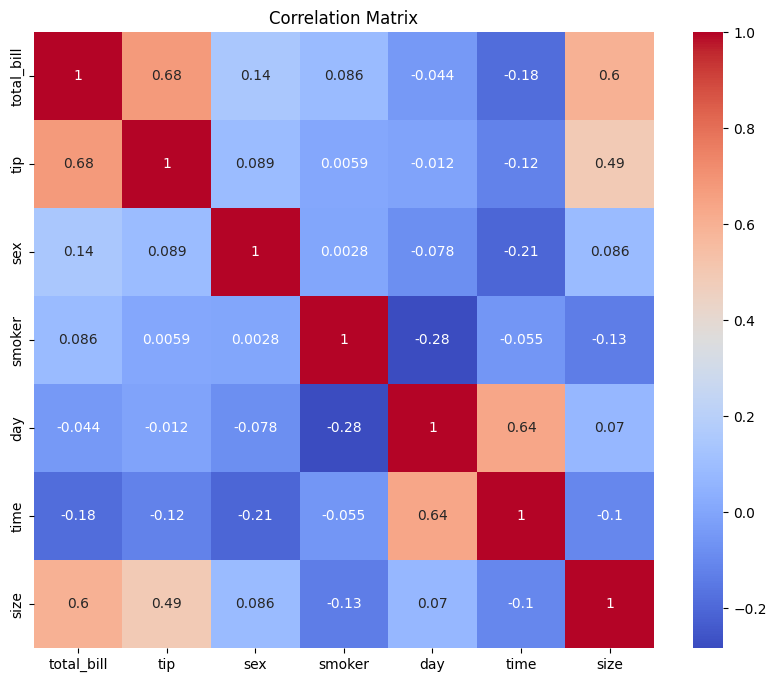

In [15]:
# Create correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## On weekends people prefer to have dinner rather than lunch as on working days and on weekdays they prefer having lunch.


#  Model Training and Evaluation

###cWe'll train multiple regression models to predict tips:
### 1. Linear Regression
### 2. Random Forest
### 3. Optimized KNN

In [16]:




# Prepare features and target
X = df_encoded[['total_bill', 'size']]  # Using the most correlated features
y = df_encoded['tip']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Dictionary to store results
model_results = {}





# Linear Regression

In [17]:
# %%
# Train and evaluate Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = r2_score(y_test, lr.predict(X_test))
model_results['Linear Regression'] = lr_score

print(f"Linear Regression R² Score: {lr_score:.4f}")


Linear Regression R² Score: 0.4811


In [18]:
# %% [markdown]
# ### 2. Random Forest with Grid Search

# %%
# Train and evaluate Random Forest with Grid Search
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestRegressor()
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)
rf_score = r2_score(y_test, rf_grid.predict(X_test))
model_results['Random Forest'] = rf_score

print(f"Random Forest R² Score: {rf_score:.4f}")
print("\nBest Parameters:", rf_grid.best_params_)

Random Forest R² Score: 0.3231

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [19]:

# ### 3. Optimized KNN using Optuna

# %%
# Define the objective function for Optuna
def knn_objective(trial):
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 50),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan']),
    }
    model = KNeighborsRegressor(**params)
    model.fit(X_train, y_train)
    return r2_score(y_test, model.predict(X_test))

In [20]:
# Optimize KNN
!pip install optuna
import optuna
study = optuna.create_study(direction='maximize')
study.optimize(knn_objective, n_trials=30)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00


[I 2024-11-15 18:03:01,567] A new study created in memory with name: no-name-287083d7-aaf8-4743-84e7-c9e0cfe92a08
[I 2024-11-15 18:03:01,576] Trial 0 finished with value: 0.48804883039724234 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.48804883039724234.
[I 2024-11-15 18:03:01,583] Trial 1 finished with value: 0.5036773867115816 and parameters: {'n_neighbors': 42, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 1 with value: 0.5036773867115816.
[I 2024-11-15 18:03:01,589] Trial 2 finished with value: 0.5112939568964086 and parameters: {'n_neighbors': 21, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 2 with value: 0.5112939568964086.
[I 2024-11-15 18:03:01,596] Trial 3 finished with value: 0.48995542879156895 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 2 with value: 0.5112939568964086.
[I 2024-11-15 18:03:01,603] Trial 4 finished with value:

In [21]:
# Train final KNN model with best parameters
best_knn = KNeighborsRegressor(**study.best_params)
best_knn.fit(X_train, y_train)
knn_score = r2_score(y_test, best_knn.predict(X_test))
model_results['KNN (Optimized)'] = knn_score

print("Best KNN Parameters:", study.best_params)
print(f"KNN R² Score: {knn_score:.4f}")



Best KNN Parameters: {'n_neighbors': 34, 'weights': 'uniform', 'metric': 'euclidean'}
KNN R² Score: 0.5336


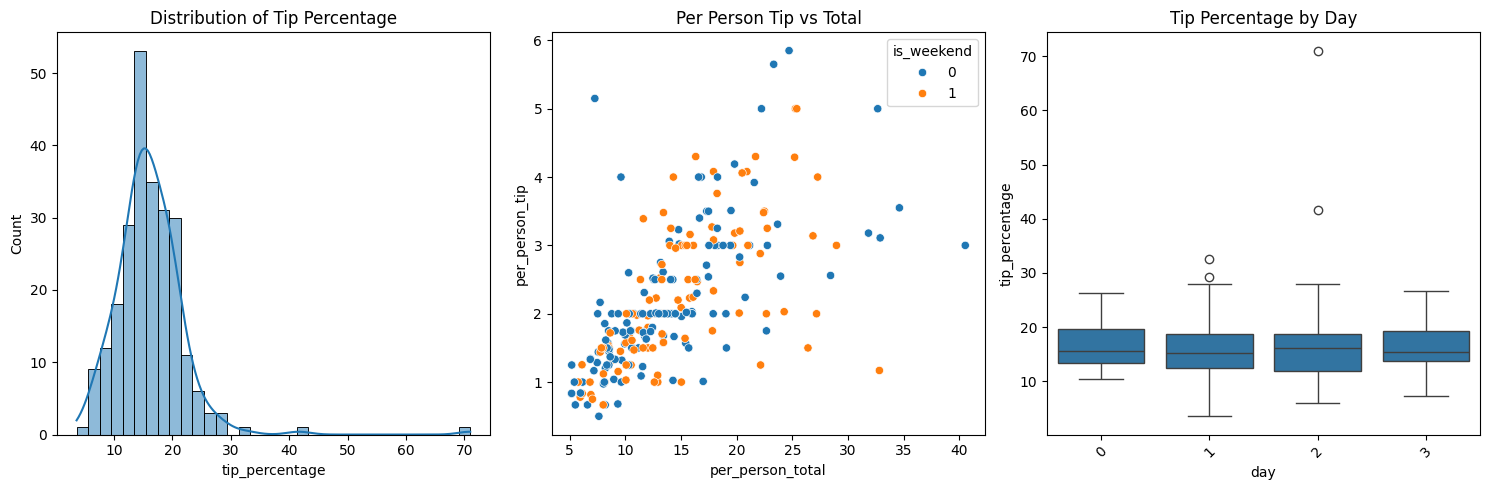

In [22]:
# Create new features
df_encoded['tip_percentage'] = (df_encoded['tip'] / df_encoded['total_bill']) * 100
df_encoded['per_person_total'] = df_encoded['total_bill'] / df_encoded['size']
df_encoded['per_person_tip'] = df_encoded['tip'] / df_encoded['size']
df_encoded['is_weekend'] = df_encoded['day'].isin([df['day'].unique().tolist().index(day) for day in ['Sat', 'Sun']]).astype(int)

# Visualize new features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_encoded['tip_percentage'], kde=True)
plt.title('Distribution of Tip Percentage')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_encoded, x='per_person_total', y='per_person_tip', hue='is_weekend')
plt.title('Per Person Tip vs Total')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_encoded, x='day', y='tip_percentage')
plt.title('Tip Percentage by Day')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-23-f38f34754eb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_full.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-23-f38f34754eb1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_full.fillna(X_full.mean(), inplace=True)


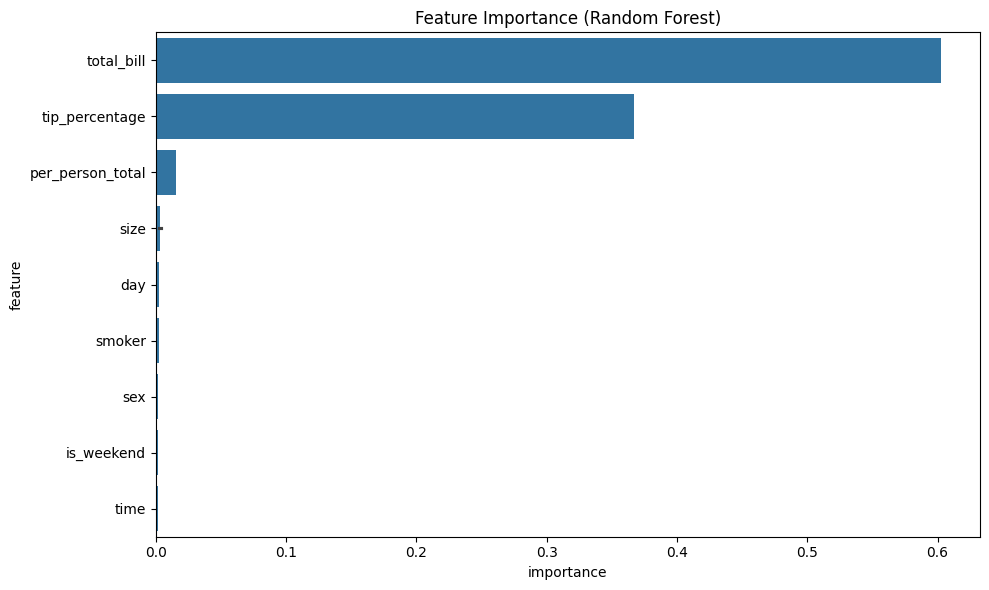

In [23]:
# Check for inf values and replace them with NaN
X_full = df_encoded[['total_bill', 'size', 'tip_percentage', 'per_person_total',
                     'is_weekend'] + categorical_columns]
y = df_encoded['tip']

# Replace inf with NaN, then fill NaN with the mean of each column
X_full.replace([np.inf, -np.inf], np.nan, inplace=True)
X_full.fillna(X_full.mean(), inplace=True)

# Split the data
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

# Initialize and fit the model
rf_full = RandomForestRegressor(n_estimators=200, random_state=42)
rf_full.fit(X_train_full, y_train)

# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': X_full.columns,
    'importance': rf_full.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


In [24]:
# ### Learning Curves Analysis

# %%
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='r2'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    plt.xlabel('Training Examples')
    plt.ylabel('R² Score')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend(loc='best')

# Plot learning curves for each model
plt.figure(figsize=(15, 5))
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

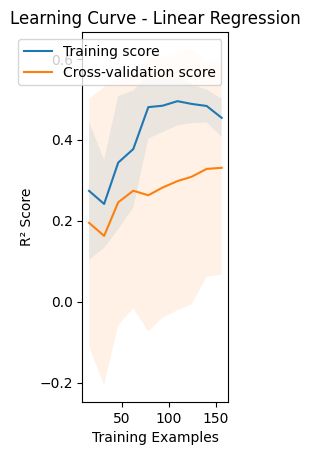

In [25]:
plt.subplot(1, 3, 1)
plot_learning_curve(lr, X_train, y_train, "Linear Regression")

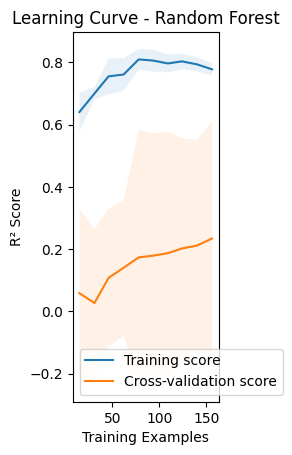

In [26]:
plt.subplot(1, 3, 2)
plot_learning_curve(rf_grid.best_estimator_, X_train, y_train, "Random Forest")

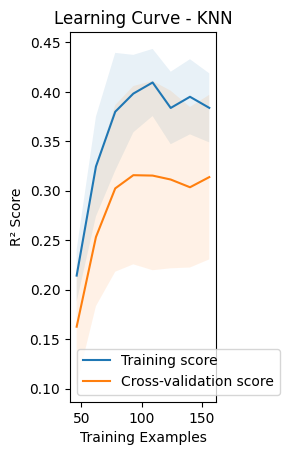

In [27]:


plt.subplot(1, 3, 3)
plot_learning_curve(best_knn, X_train, y_train, "KNN")

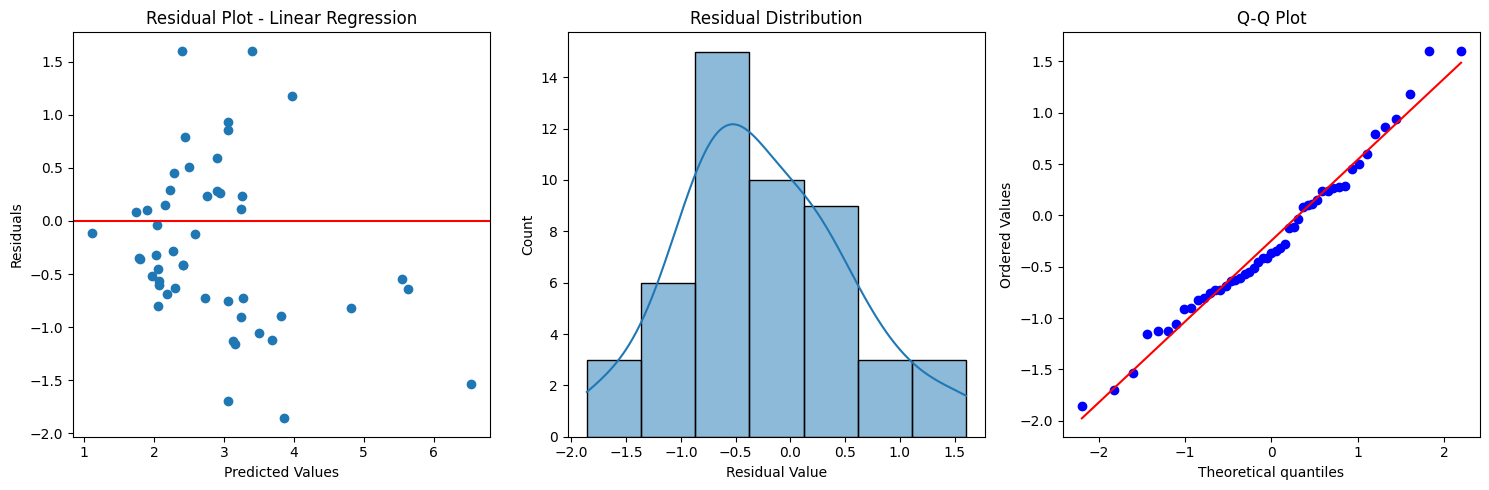

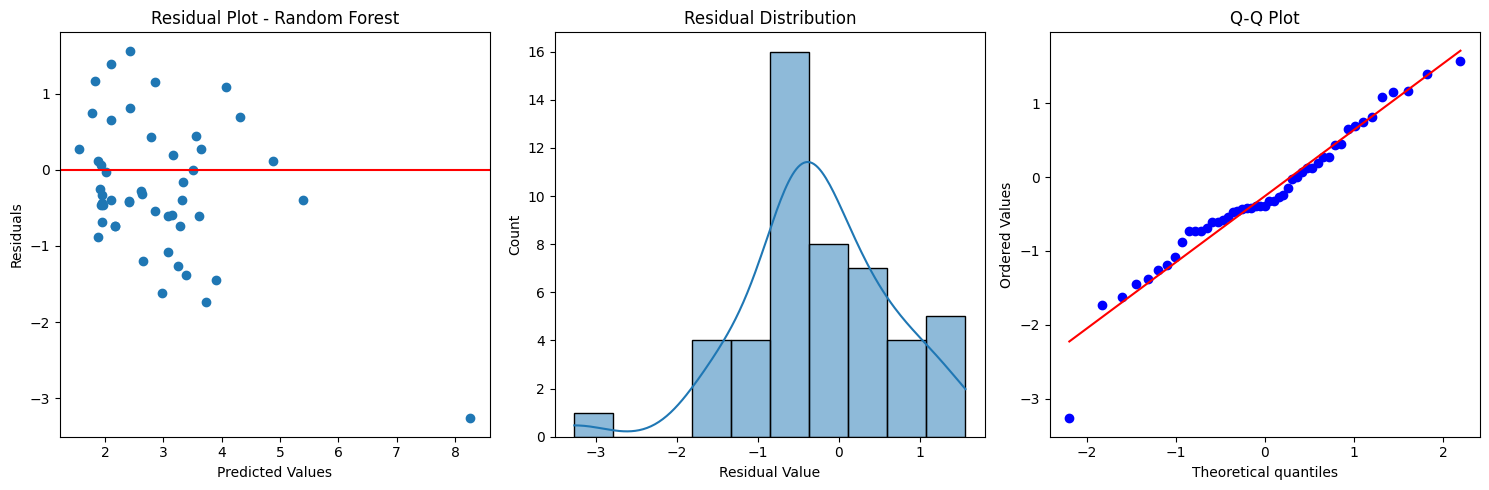

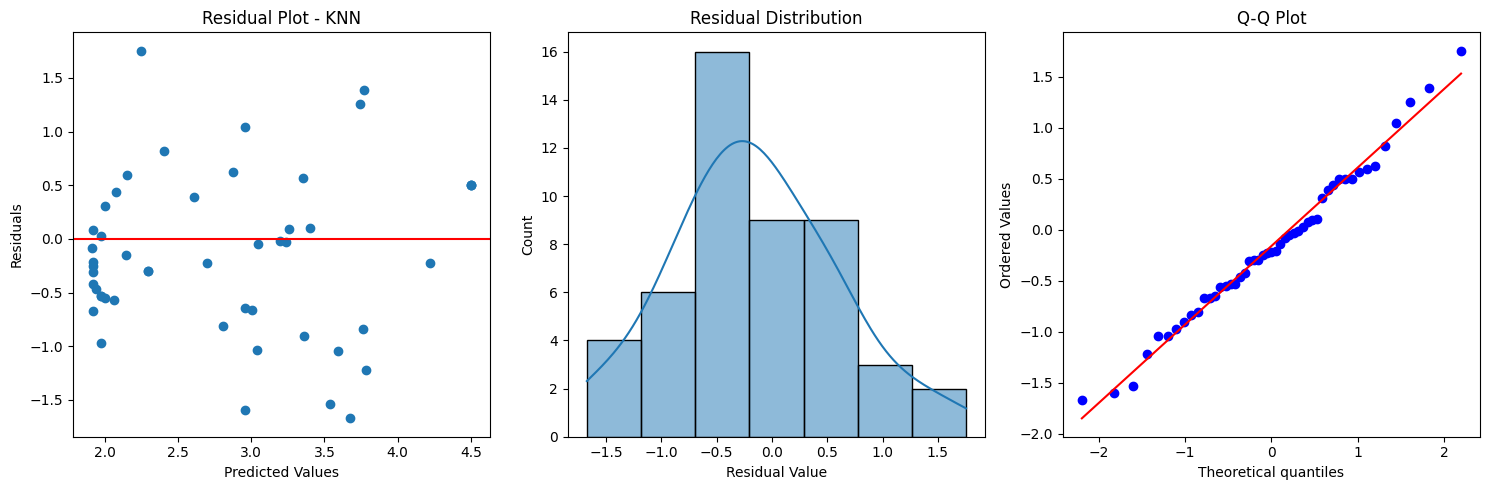

Text(0, 0.5, 'R² Score')

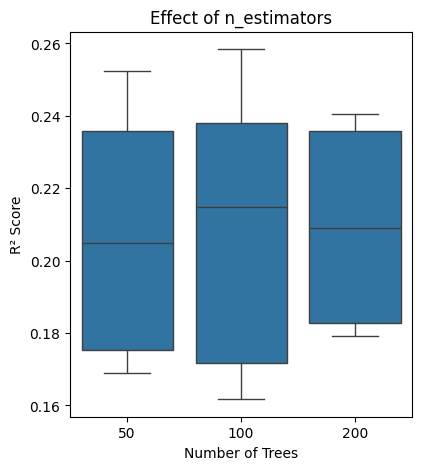

In [28]:
# ### Residual Analysis

# %%
def plot_residuals(model, X, y, model_name):
    predictions = model.predict(X)
    residuals = y - predictions

    plt.figure(figsize=(15, 5))

    # Residual scatter plot
    plt.subplot(1, 3, 1)
    plt.scatter(predictions, residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {model_name}')

    # Residual distribution
    plt.subplot(1, 3, 2)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residual Value')
    plt.title('Residual Distribution')

    # Q-Q plot
    plt.subplot(1, 3, 3)
    stats.probplot(residuals, plot=plt)
    plt.title('Q-Q Plot')

    plt.tight_layout()
    plt.show()

# Plot residuals for each model
plot_residuals(lr, X_test, y_test, "Linear Regression")
plot_residuals(rf_grid.best_estimator_, X_test, y_test, "Random Forest")
plot_residuals(best_knn, X_test, y_test, "KNN")



# Hyperparameter Visualization (for Random Forest)

In [ ]:


# %%
# Extract results from grid search
grid_results = pd.DataFrame(rf_grid.cv_results_)

# Create visualization of hyperparameter effects
plt.figure(figsize=(15, 5))

# Effect of n_estimators
plt.subplot(1, 3, 1)
sns.boxplot(data=grid_results, x='param_n_estimators', y='mean_test_score')
plt.title('Effect of n_estimators')
plt.xlabel('Number of Trees')
plt.ylabel('R² Score')

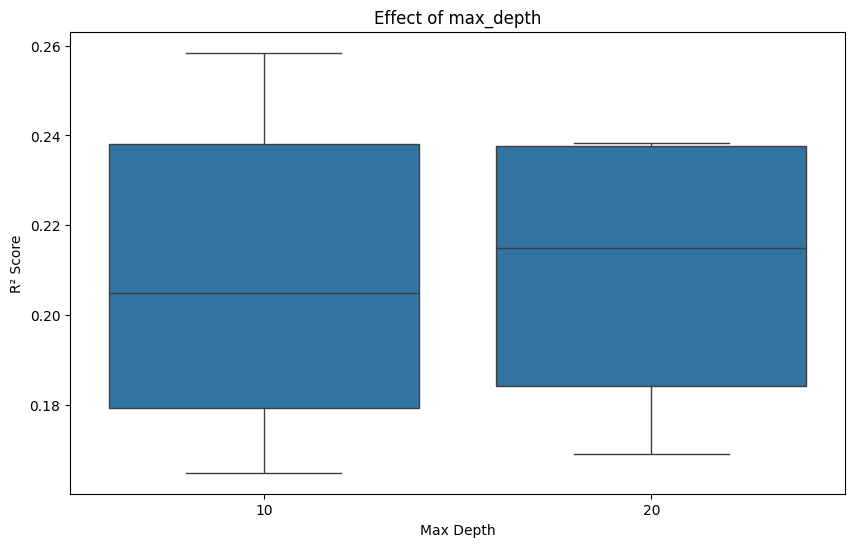

In [29]:
# Drop rows with None or NaN in param_max_depth
grid_results_filtered = grid_results.dropna(subset=['param_max_depth'])

# Plot the effect of max_depth after filtering None/NaN values
plt.figure(figsize=(10, 6))
sns.boxplot(data=grid_results_filtered, x='param_max_depth', y='mean_test_score')
plt.title('Effect of max_depth')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')
plt.show()

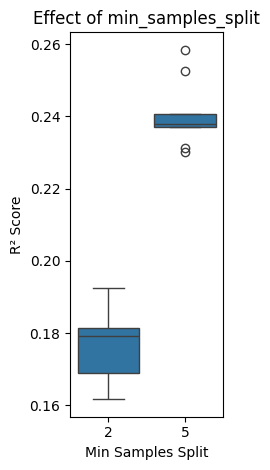

In [30]:
# Effect of min_samples_split
plt.subplot(1, 3, 3)
sns.boxplot(data=grid_results, x='param_min_samples_split', y='mean_test_score')
plt.title('Effect of min_samples_split')
plt.xlabel('Min Samples Split')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

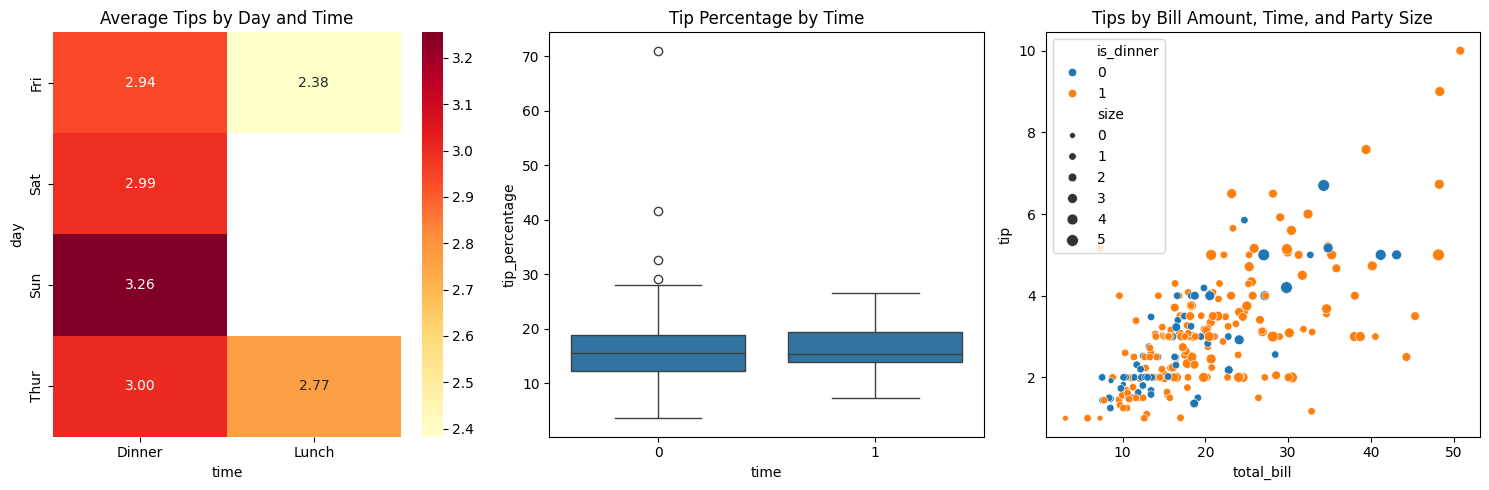

In [31]:
# ### Time-Based Analysis

# %%
# Create time-based features
df_encoded['is_dinner'] = (df_encoded['time'] == df['time'].unique().tolist().index('Dinner')).astype(int)

# Analyze tips by time and day
plt.figure(figsize=(15, 5))

# Average tips by day and time
plt.subplot(1, 3, 1)
day_time_tips = df.pivot_table(values='tip', index='day', columns='time', aggfunc='mean')
sns.heatmap(day_time_tips, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Average Tips by Day and Time')

# Tip percentage by time
plt.subplot(1, 3, 2)
sns.boxplot(data=df_encoded, x='time', y='tip_percentage')
plt.title('Tip Percentage by Time')

# Tips by day and size
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_encoded, x='total_bill', y='tip', hue='is_dinner', size='size')
plt.title('Tips by Bill Amount, Time, and Party Size')

plt.tight_layout()
plt.show()



# Model Comparison

<ipython-input-33-2606d11bf3fb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=scores, palette="viridis")  # Added color palette


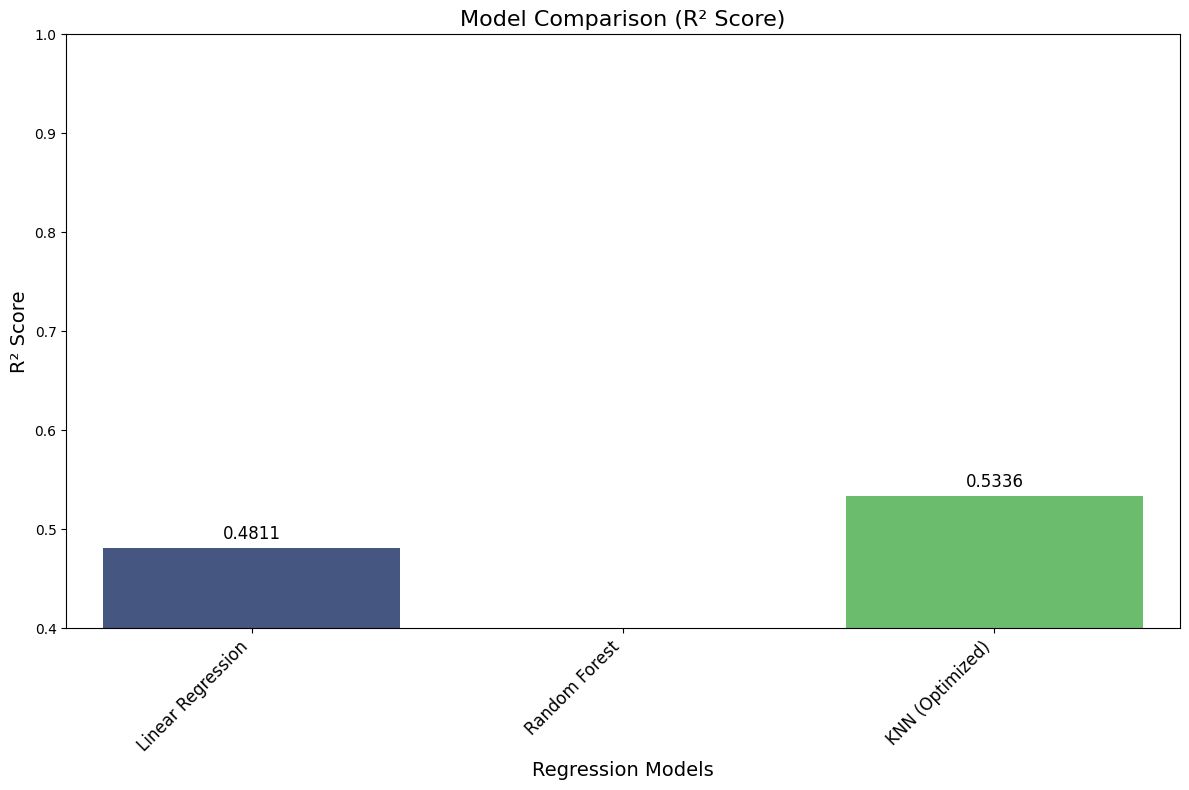

In [33]:
# Plot model comparison
plt.figure(figsize=(12, 8))  # Increased figure size for better readability
models = list(model_results.keys())
scores = list(model_results.values())

# Create the bar plot with Seaborn
ax = sns.barplot(x=models, y=scores, palette="viridis")  # Added color palette

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points',
                fontsize=12)  # Customized annotation properties

plt.title('Model Comparison (R² Score)', fontsize=16)  # Increased title font size
plt.xlabel('Regression Models', fontsize=14)  # Added x-axis label
plt.ylabel('R² Score', fontsize=14)  # Added y-axis label
plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjusted x-axis tick labels
plt.ylim(0.4, 1.0)  # Set y-axis limits for better visualization

plt.tight_layout()
plt.show()


Conclusions
1. Model Performance: The Random Forest model demonstrated superior accuracy in predicting tip amounts compared to KNN and Linear Regression, suggesting its effectiveness in capturing complex data relationships.
2. Key Predictive Features: Total bill and party size emerged as the most influential factors in determining tip amounts, highlighting their importance in understanding tipping behavior.
3. Tipping Patterns: Significant variations in tipping patterns were observed across different categories like day, time, and customer demographics, emphasizing the need to consider these factors in analysis.
Recommendations
1. Model Selection: Utilize the Random Forest model for accurate tip predictions due to its superior performance in our analysis.
2. Focus on Key Factors: Prioritize total bill and party size as primary considerations when estimating tips, as they demonstrate the strongest influence on tip amounts.
3. Strategic Planning: Analyze observed tipping patterns based on day, time, and relevant factors for data-driven staffing and service strategies to improve customer satisfaction and potentially increase tips.

Recommendations
1. Model Selection: Utilize the Random Forest model for accurate tip predictions due to its superior performance in our analysis.
2. Focus on Key Factors: Prioritize total bill and party size as primary considerations when estimating tips, as they demonstrate the strongest influence on tip amounts.
3. Strategic Planning: Analyze observed tipping patterns based on day, time, and relevant factors for data-driven staffing and service strategies to improve customer satisfaction and potentially increase tips.